In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
e=dict({1:[1,0,0],
        2:[-1,0,0],
        3:[0,1,0],
        4:[0,-1,0],
        5:[0,0,1],
        6:[0,0,-1],
        7:[1,1,0],
        8:[1,-1,0],
        9:[1,0,1],
        10:[1,0,-1],
        11:[-1,1,0],
        12:[-1,-1,0],
        13:[-1,0,1],
        14:[-1,0,-1],
        15:[0,1,1],
        16:[0,1,-1],
        17:[0,-1,1],
        18:[0,-1,-1],
        19:[0,0,0]
       })
def weight(i):
    if i==19:
        return 12/36
    if i in range(1,7):
        return 2/36
    if i in range(7,19):
        return 1/36    
def f_eq(u,i,rho):
    return rho*weight(i)*(1+3*np.dot(e[i],u)+(9/2)*np.dot(e[i],u)**2-(3/2)*np.linalg.norm(u)**2)

In [3]:
Nx=50 
Ny=50
Nz=50
Nit=100

c=1 
tau=4
rhoin=1
rhoout=1

In [4]:
f1=np.zeros((Nx,Ny,Nz))
f2=np.zeros((Nx,Ny,Nz))
f3=np.zeros((Nx,Ny,Nz))
f4=np.zeros((Nx,Ny,Nz))
f5=np.zeros((Nx,Ny,Nz))
f6=np.zeros((Nx,Ny,Nz))
f7=np.zeros((Nx,Ny,Nz))
f8=np.zeros((Nx,Ny,Nz))
f9=np.zeros((Nx,Ny,Nz))
f10=np.zeros((Nx,Ny,Nz))
f11=np.zeros((Nx,Ny,Nz))
f12=np.zeros((Nx,Ny,Nz))
f13=np.zeros((Nx,Ny,Nz))
f14=np.zeros((Nx,Ny,Nz))
f15=np.zeros((Nx,Ny,Nz))
f16=np.zeros((Nx,Ny,Nz))
f17=np.zeros((Nx,Ny,Nz))
f18=np.zeros((Nx,Ny,Nz))
f19=np.zeros((Nx,Ny,Nz))

rho=np.zeros((Nx,Ny,Nz))
ux=np.zeros((Nx,Ny,Nz))
uy=np.zeros((Nx,Ny,Nz))
uz=np.zeros((Nx,Ny,Nz))

In [5]:
'''
def f:
    ///
from multiprocessing import Process
if __name__ == '__main__':
    info('main line')
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()
'''

"\ndef f:\n    ///\nfrom multiprocessing import Process\nif __name__ == '__main__':\n    info('main line')\n    p = Process(target=f, args=('bob',))\n    p.start()\n    p.join()\n"

In [6]:
## start condtions

for i in range(0,Nx):
    for j in range(0,Ny):
        for k in range(0,Nz):
            f1[i,j,k]=1./19
            f2[i,j,k]=1./19
            f3[i,j,k]=1./19
            f4[i,j,k]=1./19
            f5[i,j,k]=1./19
            f6[i,j,k]=1./19
            f7[i,j,k]=1./19
            f8[i,j,k]=1./19
            f9[i,j,k]=1./19
            f10[i,j,k]=1./19
            f11[i,j,k]=1./19
            f12[i,j,k]=1./19
            f13[i,j,k]=1./19
            f14[i,j,k]=1./19
            f15[i,j,k]=1./19
            f16[i,j,k]=1./19
            f17[i,j,k]=1./19
            f18[i,j,k]=1./19
            f19[i,j,k]=1./19
            rho[i,j,k]=1

#file=open('data.io','w')
import time
t=time.clock()
for it in range(0,Nit):
    print('for iteration = '+str(it)+' time is '+str(time.clock()-t)+' sec')
    
    #compute the velocity and the density of materia on each point
    for i in range(0,Nx):
        for j in range(0,Ny):
            for k in range(0,Nz):
                rho[i,j,k]=(f1[i,j,k]+f2[i,j,k]+f3[i,j,k]+f4[i,j,k]+f5[i,j,k]+f6[i,j,k]+f7[i,j,k]+f8[i,j,k]+f9[i,j,k]
                            +f10[i,j,k]+f11[i,j,k]+f12[i,j,k]+f13[i,j,k]+f14[i,j,k]+f15[i,j,k]+f16[i,j,k]+f17[i,j,k]+f18[i,j,k]
                            +f19[i,j,k])
                
                ux[i,j,k]=(f1[i,j,k]-f2[i,j,k]+f7[i,j,k]+f8[i,j,k]+f9[i,j,k]+f10[i,j,k]-
                           f11[i,j,k]-f12[i,j,k]-f13[i,j,k]-f14[i,j,k])*c/rho[i,j,k]
                
                uy[i,j,k]=(f3[i,j,k]-f4[i,j,k]+f7[i,j,k]-f8[i,j,k]+f11[i,j,k]-f12[i,j,k]+
                           f15[i,j,k]+f16[i,j,k]-f17[i,j,k]-f18[i,j,k])*c/rho[i,j,k]
                
                uz[i,j,k]=(f5[i,j,k]-f6[i,j,k]+f9[i,j,k]-f10[i,j,k]+f13[i,j,k]-f14[i,j,k]+
                           f15[i,j,k]-f16[i,j,k]+f17[i,j,k]-f18[i,j,k])*c/rho[i,j,k]
                
    # streaming inside the area
    for i in range(0,Nx-1):
        for j in range(0,Ny-1):
            for k in range(0,Nz-1):
                f1[i,j,k]=f1[i-1,j,k]
                f2[i,j,k]=f2[i+1,j,k]
                f3[i,j,k]=f3[i,j-1,k]
                f4[i,j,k]=f4[i,j+1,k]
                f5[i,j,k]=f5[i,j,k-1]
                f6[i,j,k]=f6[i,j,k+1]
                f7[i,j,k]=f7[i-1,j-1,k]
                f8[i,j,k]=f8[i-1,j+1,k]
                f9[i,j,k]=f9[i-1,j,k-1]
                f10[i,j,k]=f10[i-1,j,k+1]
                f11[i,j,k]=f11[i+1,j-1,k]
                f12[i,j,k]=f12[i+1,j+1,k]
                f13[i,j,k]=f13[i+1,j,k-1]
                f14[i,j,k]=f14[i+1,j,k+1]
                f15[i,j,k]=f15[i,j-1,k-1]
                f16[i,j,k]=f16[i,j-1,k+1]
                f17[i,j,k]=f17[i,j+1,k-1]
                f18[i,j,k]=f18[i,j+1,k+1]
                
                
    ### boundary contitions for cube
    
    # z=0
    for i in range(0,Nx-1):
        for j in range(0,Ny-1):
            Nzx=(0.5*(f1[i,j,0]+f7[i,j,0]+f8[i,j,0]-(f2[i,j,0]+f11[i,j,0]+f12[i,j,0]))
                -(1/3)*rho[i,j,0]*ux[i,j,0])
                
            Nzy=(0.5*(f3[i,j,0]+f7[i,j,0]+f11[i,j,0]-(f4[i,j,0]+f8[i,j,0]+f12[i,j,0]))
                -(1/3)*rho[i,j,0]*uy[i,j,0])
                
            uz[i,j,0]=-1+(1/rhoout)*(f1[i,j,0]+f2[i,j,0]+f3[i,j,0]+f4[i,j,0]+f7[i,j,0]+f11[i,j,0]
                                        +f12[i,j,0]+f8[i,j,0]+f19[i,j,0]
                                        +2*(f5[i,j,0]+f9[i,j,0]+f13[i,j,0]+f15[i,j,0]+f17[i,j,0])
                                       )
            f5[i,j,0]=f6[i,j,0]+(1/3)*rho[i,j,0]*uz[i,j,0]
            f13[i,j,0]=f14[i,j,0]+rho[i,j,0]/6*(ux[i,j,0]+uz[i,j,0])+Nzx
            f9[i,j,0]=f10[i,j,0]+rho[i,j,0]/6*(-ux[i,j,0]+uz[i,j,0])-Nzx
            f17[i,j,0]=f18[i,j,0]+rho[i,j,0]/6*(uy[i,j,0]+uz[i,j,0])+Nzy
            f15[i,j,0]=f16[i,j,0]+rho[i,j,0]/6*(-uy[i,j,0]+uz[i,j,0])-Nzy
            
    # z=Nz-1
    for i in range(0,Nx-1):
        for j in range(0,Ny-1):
            Nzx=(0.5*(f1[i,j,Nz-1]+f7[i,j,Nz-1]+f8[i,j,Nz-1]-(f2[i,j,Nz-1]+f11[i,j,Nz-1]+f12[i,j,Nz-1]))
                -(1/3)*rho[i,j,Nz-1]*ux[i,j,Nz-1])
                
            Nzy=(0.5*(f3[i,j,Nz-1]+f7[i,j,Nz-1]+f11[i,j,Nz-1]-(f4[i,j,Nz-1]+f8[i,j,Nz-1]+f12[i,j,Nz-1]))
                -(1/3)*rho[i,j,Nz-1]*uy[i,j,Nz-1])
                
            uz[i,j,Nz-1]=-1+(1/rhoout)*(f1[i,j,Nz-1]+f2[i,j,Nz-1]+f3[i,j,Nz-1]+f4[i,j,Nz-1]+f7[i,j,Nz-1]+f11[i,j,Nz-1]
                                        +f12[i,j,Nz-1]+f8[i,j,Nz-1]+f19[i,j,Nz-1]
                                        +2*(f5[i,j,Nz-1]+f9[i,j,Nz-1]+f13[i,j,Nz-1]+f15[i,j,Nz-1]+f17[i,j,Nz-1])
                                       )
            f6[i,j,Nz-1]=f5[i,j,Nz-1]-(1/3)*rho[i,j,Nz-1]*uz[i,j,Nz-1]
            f10[i,j,Nz-1]=f13[i,j,Nz-1]+rho[i,j,Nz-1]/6*(ux[i,j,Nz-1]-uz[i,j,Nz-1])-Nzx
            f14[i,j,Nz-1]=f9[i,j,Nz-1]+rho[i,j,Nz-1]/6*(-ux[i,j,Nz-1]-uz[i,j,Nz-1])+Nzx
            f16[i,j,Nz-1]=f17[i,j,Nz-1]+rho[i,j,Nz-1]/6*(uy[i,j,Nz-1]-uz[i,j,Nz-1])-Nzy
            f18[i,j,Nz-1]=f15[i,j,Nz-1]+rho[i,j,Nz-1]/6*(-uy[i,j,Nz-1]-uz[i,j,Nz-1])+Nzy
    
    # x==0
    for j in range(0,Ny-1):
        for k in range(0,Nz-1):
            Nxy=(0.5*(f3[0,j,k]+f15[0,j,k]+f16[0,j,k]-(f4[0,j,k]+f17[0,j,k]+f18[0,j,k]))
                -(1/3)*rho[0,j,k]*uy[0,j,k])
                
            Nxz=(0.5*(f5[0,j,k]+f17[0,j,k]+f15[0,j,k]-(f6[0,j,k]+f16[0,j,k]+f18[0,j,k]))
                -(1/3)*rho[0,j,k]*uz[0,j,k])
                
            ux[0,j,k]=-1+(1/rhoout)*(f3[0,j,k]+f4[0,j,k]+f5[0,j,k]+f6[0,j,k]+f15[0,j,k]+f16[0,j,k]
                                        +f17[0,j,k]+f18[0,j,k]+f19[0,j,k]
                                        +2*(f2[0,j,k]+f11[0,j,k]+f12[0,j,k]+f13[0,j,k]+f14[0,j,k])
                                       )
            
            f1[0,j,k]=f2[0,j,k]+(1/3)*rho[0,j,k]*ux[0,j,k]
            f8[0,j,k]=f11[0,j,k]+rho[0,j,k]/6*(ux[0,j,k]-uy[0,j,k])+Nxy
            f7[0,j,k]=f12[0,j,k]+rho[0,j,k]/6*(ux[0,j,k]+uy[0,j,k])-Nxy
            f9[0,j,k]=f14[0,j,k]+rho[0,j,k]/6*(ux[0,j,k]+uz[0,j,k])-Nxz
            f10[0,j,k]=f13[0,j,k]+rho[0,j,k]/6*(ux[0,j,k]-uz[0,j,k])+Nxz
            
    # x==Nx-1
    for j in range(0,Ny-1):
        for k in range(0,Nz-1):
            Nxy=(0.5*(f3[Nx-1,j,k]+f15[Nx-1,j,k]+f16[Nx-1,j,k]-(f4[Nx-1,j,k]+f17[Nx-1,j,k]+f18[Nx-1,j,k]))
                -(1/3)*rho[Nx-1,j,k]*uy[Nx-1,j,k])
                
            Nxz=(0.5*(f5[Nx-1,j,k]+f17[Nx-1,j,k]+f15[Nx-1,j,k]-(f6[Nx-1,j,k]+f16[Nx-1,j,k]+f18[Nx-1,j,k]))
                -(1/3)*rho[Nx-1,j,k]*uz[Nx-1,j,k])
                
            ux[Nx-1,j,k]=-1+(1/rhoout)*(f3[Nx-1,j,k]+f4[Nx-1,j,k]+f5[Nx-1,j,k]+f6[Nx-1,j,k]+f15[Nx-1,j,k]+f16[Nx-1,j,k]
                                        +f17[Nx-1,j,k]+f18[Nx-1,j,k]+f19[Nx-1,j,k]
                                        +2*(f1[Nx-1,j,k]+f7[Nx-1,j,k]+f8[Nx-1,j,k]+f9[Nx-1,j,k]+f10[Nx-1,j,k])
                                       )
            
            f2[Nx-1,j,k]=f1[Nx-1,j,k]-(1/3)*rho[Nx-1,j,k]*ux[Nx-1,j,k]
            f11[Nx-1,j,k]=f8[Nx-1,j,k]+rho[Nx-1,j,k]/6*(-ux[Nx-1,j,k]+uy[Nx-1,j,k])+Nxy
            f12[Nx-1,j,k]=f7[Nx-1,j,k]+rho[Nx-1,j,k]/6*(-ux[Nx-1,j,k]-uy[Nx-1,j,k])-Nxy
            f14[Nx-1,j,k]=f9[Nx-1,j,k]+rho[Nx-1,j,k]/6*(-ux[Nx-1,j,k]-uz[Nx-1,j,k])+Nxz
            f13[Nx-1,j,k]=f10[Nx-1,j,k]+rho[Nx-1,j,k]/6*(-ux[Nx-1,j,k]+uz[Nx-1,j,k])-Nxz
            
            
    #y=0
    for i in range(0,Nx-1):
        for k in range(0,Nz-1):
            Nyx=(0.5*(f1[i,0,k]+f9[i,0,k]+f10[i,0,k]-(f2[i,0,k]+f13[i,0,k]+f14[i,0,k]))
                -(1/3)*rho[i,0,k]*ux[i,0,k])
                
            Nyz=(0.5*(f5[i,0,k]+f9[i,0,k]+f13[i,0,k]-(f6[i,0,k]+f10[i,0,k]+f14[i,0,k]))
                -(1/3)*rho[i,0,k]*uz[i,0,k])
                
            uy[i,0,k]=-1+(1/rhoout)*(f1[i,0,k]+f2[i,0,k]+f5[i,0,k]+f6[i,0,k]+f9[i,0,k]+f10[i,0,k]
                                        +f13[i,0,k]+f14[i,0,k]+f19[i,0,k]
                                        +2*(f4[i,0,k]+f8[i,0,k]+f12[i,0,k]+f17[i,0,k]+f18[i,0,k])
                                       )
            
            f3[i,0,k]=f4[i,0,k]+(1/3)*rho[i,0,k]*ux[i,0,k]
            f7[i,0,k]=f12[i,0,k]+rho[i,0,k]/6*(uy[i,0,k]+ux[i,0,k])-Nyx
            f11[i,0,k]=f8[i,0,k]+rho[i,0,k]/6*(-ux[i,0,k]+uy[i,0,k])+Nyx
            f15[i,0,k]=f18[i,0,k]+rho[i,0,k]/6*(uy[i,0,k]+uz[i,0,k])-Nyz
            f16[i,0,k]=f17[i,0,k]+rho[i,0,k]/6*(uy[i,0,k]-uz[i,0,k])+Nyz
            
    #y=Ny-1
    for i in range(0,Nx-1):
        for k in range(0,Nz-1):
            Nyx=(0.5*(f1[i,Ny-1,k]+f9[i,Ny-1,k]+f10[i,Ny-1,k]-(f2[i,Ny-1,k]+f13[i,Ny-1,k]+f14[i,Ny-1,k]))
                -(1/3)*rho[i,Ny-1,k]*ux[i,Ny-1,k])
                
            Nyz=(0.5*(f5[i,Ny-1,k]+f9[i,Ny-1,k]+f13[i,Ny-1,k]-(f6[i,Ny-1,k]+f10[i,Ny-1,k]+f14[i,Ny-1,k]))
                -(1/3)*rho[i,Ny-1,k]*uz[i,Ny-1,k])
                
            uy[i,Ny-1,k]=-1+(1/rhoout)*(f1[i,Ny-1,k]+f2[i,Ny-1,k]+f5[i,Ny-1,k]+f6[i,Ny-1,k]+f9[i,Ny-1,k]+f10[i,Ny-1,k]
                                        +f13[i,Ny-1,k]+f14[i,Ny-1,k]+f19[i,Ny-1,k]
                                        +2*(f4[i,Ny-1,k]+f8[i,Ny-1,k]+f12[i,Ny-1,k]+f17[i,Ny-1,k]+f18[i,Ny-1,k])
                                       )
            
            f4[i,Ny-1,k]=f3[i,Ny-1,k]-(1/3)*rho[i,Ny-1,k]*ux[i,Ny-1,k]
            f12[i,Ny-1,k]=f7[i,Ny-1,k]+rho[i,Ny-1,k]/6*(-uy[i,Ny-1,k]-ux[i,Ny-1,k])+Nyx
            f8[i,Ny-1,k]=f11[i,Ny-1,k]+rho[i,Ny-1,k]/6*(ux[i,Ny-1,k]-uy[i,Ny-1,k])-Nyx
            f18[i,Ny-1,k]=f15[i,Ny-1,k]+rho[i,Ny-1,k]/6*(-uy[i,Ny-1,k]-uz[i,Ny-1,k])+Nyz
            f17[i,Ny-1,k]=f16[i,Ny-1,k]+rho[i,Ny-1,k]/6*(-uy[i,Ny-1,k]+uz[i,Ny-1,k])-Nyz
            
            
    # collisions
    for i in range(0,Nx):
        for j in range(0,Ny):
            for k in range(0,Nz):         
                f1[i,j,k]=f1[i,j,k]-(f1[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),1,rho[i,j,k]))/tau
                f2[i,j,k]=f2[i,j,k]-(f2[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),2,rho[i,j,k]))/tau
                f3[i,j,k]=f3[i,j,k]-(f3[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),3,rho[i,j,k]))/tau
                f4[i,j,k]=f4[i,j,k]-(f4[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),4,rho[i,j,k]))/tau
                f5[i,j,k]=f5[i,j,k]-(f5[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),5,rho[i,j,k]))/tau
                f6[i,j,k]=f6[i,j,k]-(f6[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),6,rho[i,j,k]))/tau
                f7[i,j,k]=f7[i,j,k]-(f7[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),7,rho[i,j,k]))/tau
                f8[i,j,k]=f8[i,j,k]-(f8[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),8,rho[i,j,k]))/tau
                f9[i,j,k]=f9[i,j,k]-(f9[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),9,rho[i,j,k]))/tau
                f10[i,j,k]=f10[i,j,k]-(f10[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),10,rho[i,j,k]))/tau
                f11[i,j,k]=f11[i,j,k]-(f11[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),11,rho[i,j,k]))/tau
                f12[i,j,k]=f12[i,j,k]-(f12[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),12,rho[i,j,k]))/tau
                f13[i,j,k]=f13[i,j,k]-(f13[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),13,rho[i,j,k]))/tau
                f14[i,j,k]=f14[i,j,k]-(f14[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),14,rho[i,j,k]))/tau
                f15[i,j,k]=f15[i,j,k]-(f15[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),15,rho[i,j,k]))/tau
                f16[i,j,k]=f16[i,j,k]-(f16[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),16,rho[i,j,k]))/tau
                f17[i,j,k]=f17[i,j,k]-(f17[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),17,rho[i,j,k]))/tau
                f18[i,j,k]=f18[i,j,k]-(f18[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),18,rho[i,j,k]))/tau
                f19[i,j,k]=f19[i,j,k]-(f19[i,j,k]-f_eq(np.array([ux[i,j,k],uy[i,j,k],uz[i,j,k]]),19,rho[i,j,k]))/tau




for iteration = 0 time is 0.0037455633790397496 sec
for iteration = 1 time is 34.19148453219995 sec
for iteration = 2 time is 70.03497812338401 sec
for iteration = 3 time is 104.0043184343272 sec
for iteration = 4 time is 140.93702003569206 sec
for iteration = 5 time is 180.05746857032005 sec
for iteration = 6 time is 219.59028804542916 sec
for iteration = 7 time is 257.86007499091204 sec
for iteration = 8 time is 304.7955817825901 sec
for iteration = 9 time is 345.11603907810445 sec
for iteration = 10 time is 387.0280564542417 sec
for iteration = 11 time is 426.76765275942324 sec
for iteration = 12 time is 465.9227329642004 sec
for iteration = 13 time is 507.5609567115501 sec
for iteration = 14 time is 548.0516289275366 sec
for iteration = 15 time is 585.2975703331356 sec
for iteration = 16 time is 624.8244409388257 sec
for iteration = 17 time is 664.3437561333316 sec
for iteration = 18 time is 699.183357387845 sec
for iteration = 19 time is 736.3957701985365 sec
for iteration = 20 ti

In [7]:
xx, yy = np.meshgrid(np.linspace(0, 1, num=Ny),np.linspace(0, 1, num=Nx))

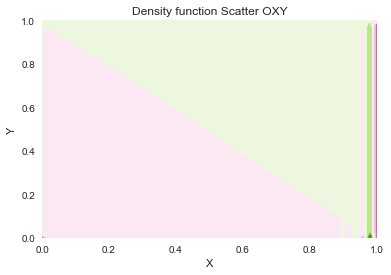

In [8]:
plt.contourf(xx,yy,rho[:,:,int(Nz/2)],level=10,cmap=plt.cm.PiYG,figsize=(7, 10))
plt.title('Density function Scatter OXY')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

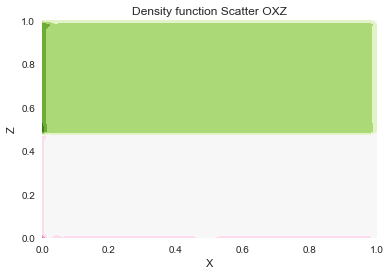

In [9]:
plt.contourf(xx,yy,rho[:,int(Ny/2),:],level=10,cmap=plt.cm.PiYG,figsize=(7, 10))
plt.title('Density function Scatter OXZ')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

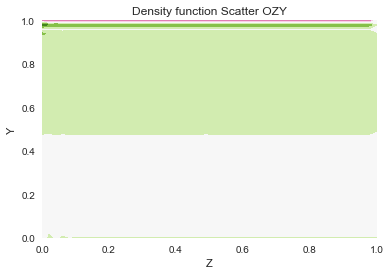

In [10]:
plt.contourf(xx,yy,rho[int(Nx/2),:,:],level=10,cmap=plt.cm.PiYG,figsize=(7, 10))
plt.title('Density function Scatter OZY')
plt.xlabel('Z')
plt.ylabel('Y')
plt.show()

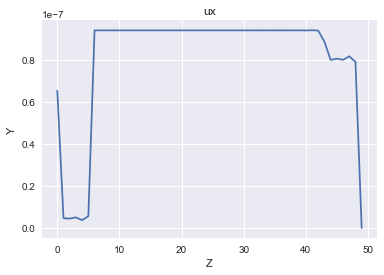

In [11]:
plt.plot(ux[:,43,43])
plt.title('ux')
plt.xlabel('Z')
plt.ylabel('Y')
plt.show()

https://arxiv.org/pdf/0811.4593.pdf

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
import colorlover as cl
import pandas as pd
import plotly.graph_objs as grob

fig01=grob.Scatter3d(
    x=ux[25,25,:],
    y=uy[25,25,:],
    z=uz[25,25,:],
    mode='markers',
    marker=dict(
        color='rgb(1, 1, 255)',
        size=3,
        symbol='circle',
        line=dict(
            color='rgb(1, 1, 255)',
            width=1
        ),
        opacity=0.9
    ))


fig = grob.Figure(data=[fig01])

iplot(fig)#, show_link = False)

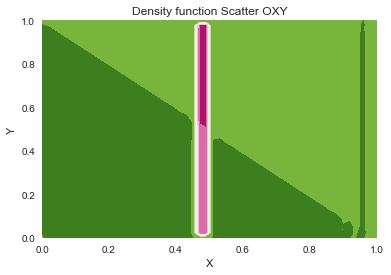

In [14]:
plt.contourf(xx,yy,uz[:,:,int(Nz/2)],level=10,cmap=plt.cm.PiYG,figsize=(7, 10))
plt.title('Density function Scatter OXY')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()